# Student Names
Jonathan Suryadiputra C00235450<br>
Weihao Liao C00253515<br>
Chi Ieong Ng  C00223421<br><br>
<b>Date:</b> 18th of February 2022

# X and Y
X = Goes back looking over a series of time e.g. past 7 days.<br>
Y = The last nth of the series of time e.g. the price of BTC on the day after the past 7 days.<br>

In [1]:
# Example
"""
look_back = 3
data = [1,2,4,5,7,8,9]

   X      Y
[1,2,4]->[5]
[2,4,5]->[7]
[4,5,7]->[8]
[5,7,8]->[9]
"""

'\nlook_back = 3\ndata = [1,2,4,5,7,8,9]\n\n   X      Y\n[1,2,4]->[5]\n[2,4,5]->[7]\n[4,5,7]->[8]\n[5,7,8]->[9]\n'

# Import dependencies

In [2]:
# install dependencies
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

# Load dataset

In [3]:
data = pd.read_csv('../datasets/Daily/gemini_ETHUSD_day.csv')

# Explore dataset

In [4]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1644033600000,2022-02-05 04:00:00,ETHUSD,3000.46,3062.85,2964.23,3023.46,6873.778128
1,1643947200000,2022-02-04 04:00:00,ETHUSD,2685.66,3018.68,2678.05,3000.46,30992.365110
2,1643860800000,2022-02-03 04:00:00,ETHUSD,2659.30,2700.00,2576.87,2685.66,11232.318486
3,1643774400000,2022-02-02 04:00:00,ETHUSD,2783.81,2909.13,2615.32,2659.30,16921.173294
4,1643688000000,2022-02-01 04:00:00,ETHUSD,2754.14,2815.69,2719.52,2783.81,17279.053623


In [5]:
data.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2094,1463112000,2016-05-13 04:00:00,ETHUSD,10.40,11.59,10.20,10.50,1788.043079
2095,1463025600,2016-05-12 04:00:00,ETHUSD,10.45,12.00,9.92,10.40,2061.012106
2096,1462939200,2016-05-11 04:00:00,ETHUSD,9.74,10.47,9.69,10.45,3079.531401
2097,1462852800,2016-05-10 04:00:00,ETHUSD,9.36,9.95,9.36,9.74,764.628290
2098,1462766400,2016-05-09 04:00:00,ETHUSD,0.00,12.00,0.00,9.36,1376.614767


In [6]:
data.columns

Index(['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume'],
      dtype='object')

In [7]:
data = data.drop(columns=['Unix Timestamp', 'Symbol', 'Open', 'High', 'Low', 'Volume'])

In [8]:
data.shape

(2099, 2)

In [9]:
data.describe()

,Close
count,2099.000000
mean,742.382844
std,1106.312649
min,7.030000
25%,137.930000
50%,249.760000
75%,646.450000
max,4816.000000


In [10]:
data.dtypes

Date      object
Close    float64
dtype: object

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_axis(data['Date'], inplace=True)
data.set_index('Date', inplace=True)

In [12]:
data.sort_index(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2099 entries, 2016-05-09 04:00:00 to 2022-02-05 04:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2099 non-null   float64
dtypes: float64(1)
memory usage: 32.8 KB


In [14]:
data

,Close
Date,
2016-05-09 04:00:00,9.36
2016-05-10 04:00:00,9.74
2016-05-11 04:00:00,10.45
2016-05-12 04:00:00,10.40
2016-05-13 04:00:00,10.50
...,...
2022-02-01 04:00:00,2783.81
2022-02-02 04:00:00,2659.30
2022-02-03 04:00:00,2685.66


# Data visualisation

In [15]:
import matplotlib.pyplot as plt

In [16]:
data['Close']

Date
2016-05-09 04:00:00       9.36
2016-05-10 04:00:00       9.74
2016-05-11 04:00:00      10.45
2016-05-12 04:00:00      10.40
2016-05-13 04:00:00      10.50
                        ...   
2022-02-01 04:00:00    2783.81
2022-02-02 04:00:00    2659.30
2022-02-03 04:00:00    2685.66
2022-02-04 04:00:00    3000.46
2022-02-05 04:00:00    3023.46
Name: Close, Length: 2099, dtype: float64

In [17]:
data_close = data['Close'].values
data_close

array([   9.36,    9.74,   10.45, ..., 2685.66, 3000.46, 3023.46])

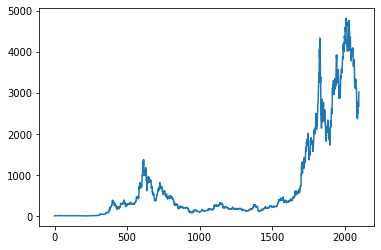

In [18]:
data_close = data_close.reshape((-1, 1))
plt.plot(data_close)
plt.show()

# Split data into train and test

In [19]:
train_size = int(len(data_close) * 0.8) # 80% of data will be for training

data_train = data_close[:train_size]
data_test = data_close[train_size:] # the rest will be for testing

print('Train data size: ', len(data_train))
print('Test data size: ', len(data_test))

Train data size:  1679
Test data size:  420


# Create time series out of data

In [20]:
look_back = 15 # look back to the past 60 minutes (one hour) of the prices

train_generator = TimeseriesGenerator(data_train, data_train, length=look_back, batch_size=64)     
test_generator = TimeseriesGenerator(data_test, data_test, length=look_back, batch_size=1)

# Set up and build LSTM model

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import L2

In [22]:
# initialise model
model = Sequential()
# add layers
model.add(LSTM(60, activation='relu', input_shape=(look_back, 1), recurrent_dropout=0.2))
model.add(Dense(1))
# compile model
model.compile(loss='mse', optimizer='adam')

In [23]:
# fit the model
num_epochs = 20
model.fit(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/20
26/26 [==============================] - 2s 10ms/step - loss: 49832.8281
Epoch 2/20
26/26 [==============================] - 0s 10ms/step - loss: 35593.3945
Epoch 3/20
26/26 [==============================] - 0s 10ms/step - loss: 30732.5332
Epoch 4/20
26/26 [==============================] - 0s 11ms/step - loss: 22783.5273
Epoch 5/20
26/26 [==============================] - 0s 11ms/step - loss: 30929.7812
Epoch 6/20
26/26 [==============================] - 0s 10ms/step - loss: 24338.4492
Epoch 7/20
26/26 [==============================] - 0s 11ms/step - loss: 14635.4014
Epoch 8/20
26/26 [==============================] - 0s 10ms/step - loss: 7850.7319
Epoch 9/20
26/26 [==============================] - 0s 11ms/step - loss: 5930.6475
Epoch 10/20
26/26 [==============================] - 0s 10ms/step - loss: 7005.6533
Epoch 11/20
26/26 [==============================] - 0s 11ms/step - loss: 5473.8667
Epoch 12/20
26/26 [==============================] - 0s 11ms/step - loss: 5144

In [24]:
prediction = model.predict(test_generator)

data_train = data_train.reshape((-1))
data_test = data_test.reshape((-1))
prediction = prediction.reshape((-1))

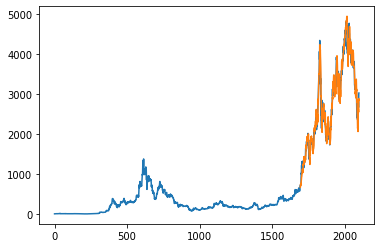

In [25]:
# Plot the predictions on a graph
prediction_plot = np.empty_like(data_close.reshape((-1)))
prediction_plot[:] = np.nan
prediction_plot[(len(data_train) + look_back):] = prediction

plt.plot(data_close)
plt.plot(prediction_plot)
plt.show()

# Make forecast

In [26]:
data_close = data_close.reshape((-1))

def predict(num_prediction, model):
    prediction_list = data_close[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

num_prediction = 100
forecast = predict(num_prediction, model)

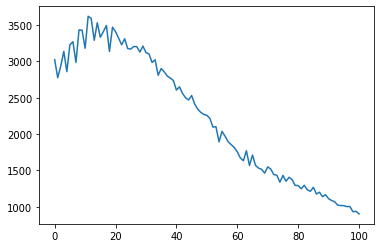

In [27]:
forecast = forecast.reshape((-1))
plt.plot(forecast)
plt.show()

In [28]:
data_forecast = np.append(data_close, forecast)

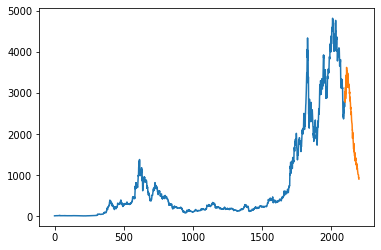

In [29]:
# Plot the forec on a graph
forecast_plot = np.empty_like(data_forecast)
forecast_plot[:] = np.nan
forecast_plot[len(data_close):] = forecast

plt.plot(data_close)
plt.plot(forecast_plot)
plt.show()